<a href="https://colab.research.google.com/github/yiboxu20/MachineLearning/blob/main/Resources/Module2/Kmeans1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning and Clustering
**Unsupervised learning** is a type of machine learning in which the algorithm is not provided with any pre-assigned labels or scores for the training data $\{\mathbf{x}^{(i)}\}_{i=1}^N$.

As a result, unsupervised learning algorithms must first self-discover any naturally occurring patterns in that training data set.

 **Clustering**
 - Given: unlabeled data samples $\{\mathbf{x}^{(i)}\}_{i=1}^N$; specify number of clusters/partitions $K$

 - Goal: group the samples into $K$ clusters, $A(\mathbf{x}^{(i)})\in \{1, \dots, K\}$.

 - The only information to use is the similarity between data samples; cluster
samples based on their mutual similarities.

- Good clustering should have
 - high within-cluster similarity

 - low inter-cluster similarity


### Similarity
Similarity is inversely related to distance.

- Euclidean distance: $d(\mathbf{x},\mathbf{z})=\|\mathbf{x}-\mathbf{z}\|_2$.

- kernelized distance: $d(\mathbf{x},\mathbf{z})= \|\phi(\mathbf{x}) - \phi(\mathbf{z})\|_2$ for some nonlinear mapping $\phi$.

Different choices of distances lead to different clustering.

<img src="https://github.com/yiboxu20/MachineLearning/blob/main/Resources/images/clustering.png?raw=true" width="600" />


<img src="https://github.com/yiboxu20/MachineLearning/blob/main/Resources/images/clustering_multiple.png?raw=true" width="800" />

### Clustering is subjective
- Non-trivial to say one partition is always better than others.

- Each algorithm has two parts:
 - Define the **objective function** and its **distance function**.

 - Design an algorithm to minimize this **objective function**.


# K-means clustering
Which is the following is better?

<img src="https://github.com/yiboxu20/MachineLearning/blob/main/Resources/images/clustering1.png?raw=true" width="400" />

<img src="https://github.com/yiboxu20/MachineLearning/blob/main/Resources/images/clustering2.png?raw=true" width="400" />

We want the blue points $\mathcal{C}_{blue}$ looks much more clustered. So?

 Mathematically, we want they have the smaller within-cluster variance.
$$\sum_{\mathbf{x}^{(i)}\in \mathcal{C}_{blue}} \|\mathbf{x}^{(i)}-\mu_{blue}\|_2^2 = |\mathcal{C}_{blue}|\cdot \text{Var}(\mathcal{C}_{blue})$$
with $\mu_{blue} = \frac{1}{|\mathcal{C}_{blue}|}\sum_{\mathbf{x}^{(i)}\in \mathcal{C}_{blue}} \mathbf{x}^{(i)}$.

### K-means algorithm
Given dataset $\{\mathbf{x}^{(1)}, \dots,\mathbf{x}^{(N)} \}\subset \mathbb{R}^d$ and the number of clusters $K$

- use Euclidean distance as similarity criteria

- given a cluster of points $\mathcal{C}$, the mean $\mu$ of data points is defined as the centroid of the cluster $\mathcal{C}$.

- **Goal**: find the $K$ clusters $\mathcal{C}_{1, \dots, K}$ and their centroids $\mu= \{\mu_1, \dots, \mu_K\}$ that minimize the total within cluster variance, i.e., the objective function is
 $$ \min_{\mu\in\mathbb{R}^{d\times K}}\sum_{j=1}^K \sum_{\mathbf{x}^{(i)}\in \mathcal{C}_j}\|\mathbf{x}^{(i)}-\mu_j\|^2$$

 The cost function also known as **distortion**, can be rewritten as
 $$ J(\mathbf{M}, \mathbf{Z})=\|\mathbf{X}-\mathbf{Z}\mathbf{M}^\top\|_F^2$$
where $\mathbf{X}\in \mathbb{R}^{N\times d}, \mathbf{Z}\in [0,1]^{N\times K}$ and $\mathbf{M}^{d\times K}$ containing the centroids $\mu_j$ in its columns.

-  Assign $\mathbf{x}^{(i)}$ to the cluster with the closest centroid, i.e., the cluster membership of $\mathbf{x}^{(i)}$ is
$$ \text{arg}\min_{1\le c\le K}\|\mathbf{x}^{(i)} -\mu_c \|_2^2
$$

Difficulty: very hard to find the derivative for this objective function.

### Rewrite objective function
The distortion value is
$$J = \sum_{i=1}^N\sum_{j=1}^K r_{ij}\|\mathbf{x}^{(i)}-\mu_j\|_2^2$$
where $r_{ij}\in \{0,1\}$ is an indicator variable
$$r_{ij}=1 \text{ if and only if } \mathbf{x}^{(i)}\in \mathcal{C}_{j}$$

### Lloyd's algorithm (1957)
Main idea: **alternative optimization** between $\{r_{ij}\}$ and $\{\mu_j\}$


---


- **Step 0**: Initialize $\{\mu_j\}$ to some values

- **Step 1**: Fix $\{\mu_j\}$ and minimize over $\{r_{ij}\}$:
   
   Solve the inner minimization by finding the
nearest centroid (i.e., cluster membership) for each $\mathbf{x}^{(i)}$,
$r_{ij} = \begin{cases} 1 & \text{if } j= \text{arg}\min_k \|\mathbf{x}^{(i)}-\mu_k\|_2^2 \\ 0 & \text{Otherwise}\end{cases}$.

    Equivalently,
    - Assign each $\mathbf{x}^{(i)}$ to the nearest center: $A(\mathbf{x}^{(i)})= \text{arg}\min_j ||\mathbf{x}^{(i)}-\mu_j||_2^2$.

  - Update the clusters $\mathcal{C}_j=\{\mathbf{x}^{(i)}: A(\mathbf{x}^{(i)})=j\}$ for $j=1,\dots, K  $.


- **Step 2**:  Fix $\{r_{ij}\}$ and minimize over $\{\mu_j\}$:

   Solve the outer minimization w.r.t $\mu$ to update the centroids
   $\mu_j=\frac{\sum_i r_{ij}\mathbf{x}^{(i)}}{\sum_i r_{ij}}$.
     
     Equivalently,
     - Calculate the mean of each cluster $\mathcal{C_j}$:
     $\mu_j=\frac{1}{|\mathcal{C_j}|}\sum_{\mathbf{x}^{(i)}\in \mathcal{C}_j}\mathbf{x}^{(i)}$.

- **Step 3**: Return to step 1 unless stopping criterion is met.      


---



Note:
- $K$-means is non-convex optimization problem.

- Lloyd's algorithm is descent method, i.e., the distortion value $J$ is monotonically decreasing during iterations. So it will always converge to somewhere.

- Objective function will remain unchanged when step 1 doesn't change cluster assignment. Then the algorithm is converged. **But it may not converge to global minimum.** It may get stuck at suboptimal local minimum.

- you may find your result very sensitive to initial values. So it is important to run your algorithm many times to get the distortion value. In practice, one uses 10 random initial conditions.


<img src="https://github.com/yiboxu20/MachineLearning/blob/main/Resources/images/Kmeans.png?raw=true" width="600" />
   

Populating the interactive namespace from numpy and matplotlib


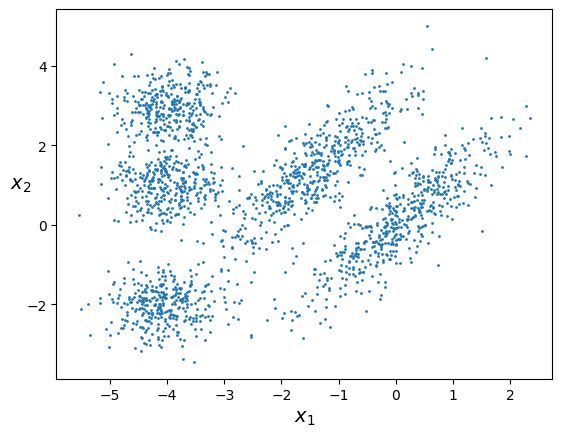

In [4]:
%pylab inline
from sklearn.datasets import make_blobs

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

if 0:
    blob_centers = np.array(
        [[ 0.2,  2.3],
         [-1.5 ,  2.3],
         [-2.8,  1.8],
         [-2.8,  2.8],
         [-2.8,  1.3]])
    blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
    X, y = make_blobs(n_samples=2000, centers=blob_centers,
                      cluster_std=blob_std, random_state=7)

if 1:
    # two off-diagonal blobs
    X1, _ = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
    X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
    # three spherical blobs
    blob_centers = np.array(
        [[ -4,  1],
         [-4 ,  3],
         [-4,  -2]])
    s = 0.5
    blob_std = np.array([s, s, s])
    X2, _ = make_blobs(n_samples=1000, centers=blob_centers,
                      cluster_std=blob_std, random_state=7)

    X = np.r_[X1, X2]
    K = 5

figure()
plot_clusters(X)

In [5]:
def euclidean_distance(x1, x2):
    return sqrt(sum((x1 - x2) ** 2))

def plot_kmeans(X,clusters, centroids):
    fig, ax = plt.subplots(figsize=(12, 8))

    for i, index in enumerate(clusters):
       point = X[index].T
       ax.scatter(*point)

    for point in centroids:
      ax.scatter(*point, marker="x", color="black", linewidth=2)

    plt.show()


def mykmeans(X, K, max_iter=100, plot_steps=False):
  n_samples, n_features = X.shape
  # Step 0: initialize
  random_sample_idxs = random.choice(n_samples, K, replace=False)
  centroids = [X[idx] for idx in random_sample_idxs]

  # Optimize clusters
  distortion_list = []
  for j in range(max_iter):

    # Step 1: Assign samples to closest centroids (create clusters)
    clusters = [[] for _ in range(K)]
    distortion_curr = 0;
    for idx, sample in enumerate(X):
       distances     = [euclidean_distance(sample, point) for point in centroids]
       closest_index = argmin(distances)
       clusters[closest_index].append(idx)
       distortion_curr = distortion_curr + min(distances)

    distortion_list.append(distortion_curr)

    if plot_steps:
      plot_kmeans(X,clusters, centroids)


    # Step 2: Calculate new centroids from the clusters
    centroids_old = centroids
    centroids     = zeros((K, n_features))
    for cluster_idx, cluster in enumerate(clusters):
      cluster_mean = mean(X[cluster], axis=0)
      centroids[cluster_idx] = cluster_mean

    if plot_steps:
      plot_kmeans(X,clusters, centroids)

    # Step 3: check if clusters have changed
      # distances between each old and new centroids, for all centroids
    distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(K)]
    if sum(distances) == 0:
      print('Number of iteration is ', j+1)
      break

  # Classify samples as the index of their clusters
  labels = empty(n_samples)
  for cluster_idx, cluster in enumerate(clusters):
     for sample_index in cluster:
        labels[sample_index] = cluster_idx


  return labels, clusters, centroids, distortion_list



In [13]:
labels, clusters, centroids, distortion_list = mykmeans(X,5,  max_iter=200, plot_steps=True)

Output hidden; open in https://colab.research.google.com to view.

In [14]:
print(centroids)

[[-3.97157853  2.9374411 ]
 [-0.48505929  1.83799099]
 [-3.95013387 -2.0160101 ]
 [-3.54714789  0.77594928]
 [-0.27790706 -0.25537878]]


In [15]:
print(distortion_list)

[np.float64(3880.5155927864625), np.float64(2593.467429116338), np.float64(2134.351715983578), np.float64(1951.506155975026), np.float64(1883.051179303382), np.float64(1870.5866886495032), np.float64(1872.0839371889865), np.float64(1870.2530721484388), np.float64(1866.3445986661284), np.float64(1861.2676352608344), np.float64(1854.9934179881213), np.float64(1845.5616013778442), np.float64(1834.5639945537102), np.float64(1821.2499372794866), np.float64(1807.3340191274403), np.float64(1796.558985955424), np.float64(1790.3581468948735), np.float64(1788.5016370219168), np.float64(1786.7861805070543), np.float64(1785.7072051697849), np.float64(1785.3074183008662), np.float64(1784.5006350293395), np.float64(1783.7176450861368), np.float64(1782.8867690987404), np.float64(1781.9546489972142), np.float64(1780.487801239962), np.float64(1778.3965455371442), np.float64(1777.407708156668)]


Text(0.5, 0, 'No. of iteration')

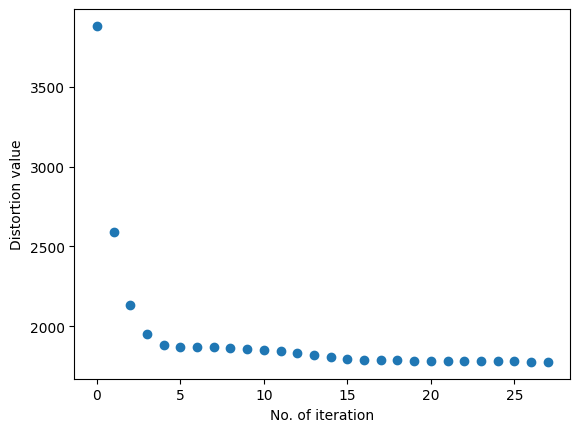

In [16]:
figure()
scatter(arange(len(distortion_list)),distortion_list)
ylabel('Distortion value')
xlabel('No. of iteration')

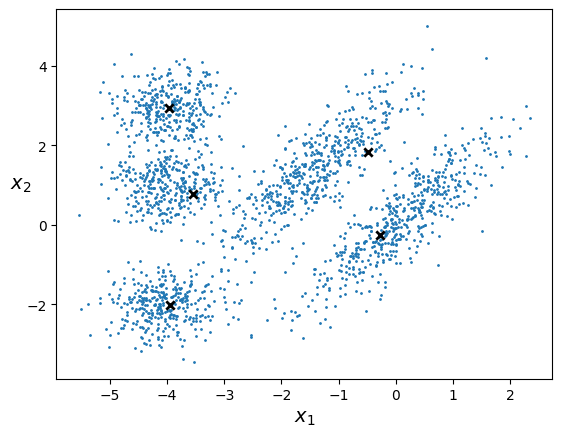

In [17]:
figure()
plot_clusters(X)
scatter(centroids[:,0],centroids[:,1],marker="x", color="black", linewidth=2)

In [18]:
# for test data, this assign to its neatest centroid.
def mykmeans_predict(X_test, centroids):
  n_samples, n_features = X_test.shape
  labels = empty(n_samples)
  for idx, sample in enumerate(X_test):
    distances     = [euclidean_distance(sample, point) for point in centroids]
    closest_index = argmin(distances)
    labels[idx]   = closest_index

  return labels

# illustration of K-means clustering applied to some points in the 2d plane. We see
# that the method induces a Voronoi tessellation of the points.
def plot_decision_boundaries(centroids, X, distortion, resolution=1000):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = mykmeans_predict(np.c_[xx.ravel(), yy.ravel()],centroids )
    Z = Z.reshape(xx.shape)

    figure()
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plt. title('distortion = {:0.2f}'.format(distortion, fontsize=14))
    plot_clusters(X)
    scatter(centroids[:,0],centroids[:,1],marker="x", color="black", linewidth=2)

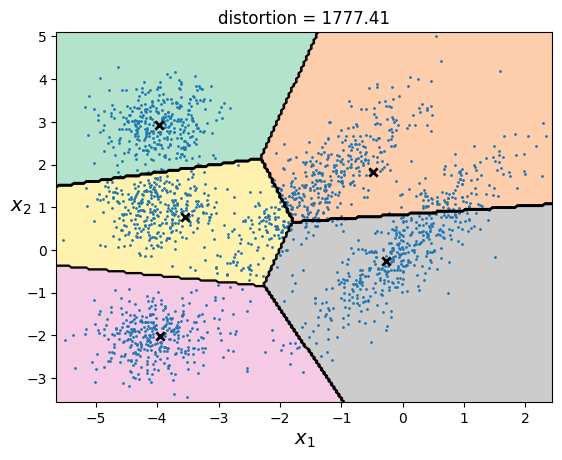

In [19]:
plot_decision_boundaries(centroids, X, distortion_list[-1], resolution=200)